# Disease prediction

In [1]:
#TODO: comment 
#TODO: rename columns in datasets 
#TODO: graph styline 
#TODO: write in the instructions 
#TODO: move the import up in one spot 

#DONE : 
#   

In [1]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# 2.0 EDA

In [2]:
#reading the data in

df = pd.read_csv("Cardio-data/cardio_train.csv")

In [4]:
#data checking 

#df.info()
#df.describe()

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# number of people with cardio 

df_cardio = pd.DataFrame(df[["cardio"]].value_counts()).rename(columns = {0:"Number of patients"})

print(f"Number of people WITH heart disease : {df_cardio[df_cardio.index == (1,)].values[0][0]}")
print(f"Number of people WITHOUT heart disease : {df_cardio[df_cardio.index == (0,)].values[0][0]}")


Number of people WITH heart disease : 34979
Number of people WITHOUT heart disease : 35021


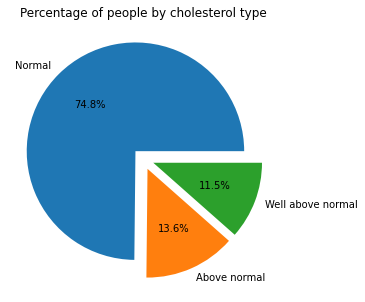

In [131]:
# number of people by cholesterol level
df_cholesterol = pd.DataFrame(df[["cholesterol"]].groupby("cholesterol").size()).rename(columns={0:"Number of people"}).reset_index()

plt.figure(
            figsize=(10,5),
            facecolor="white"
            )
plt.pie(
            df_cholesterol["Number of people"], 
            labels = ["Normal","Above normal","Well above normal"], 
            explode=(0.1, 0.1, 0.1),
            autopct='%1.1f%%'
            )
plt.title("Percentage of people by cholesterol type")
plt.show()

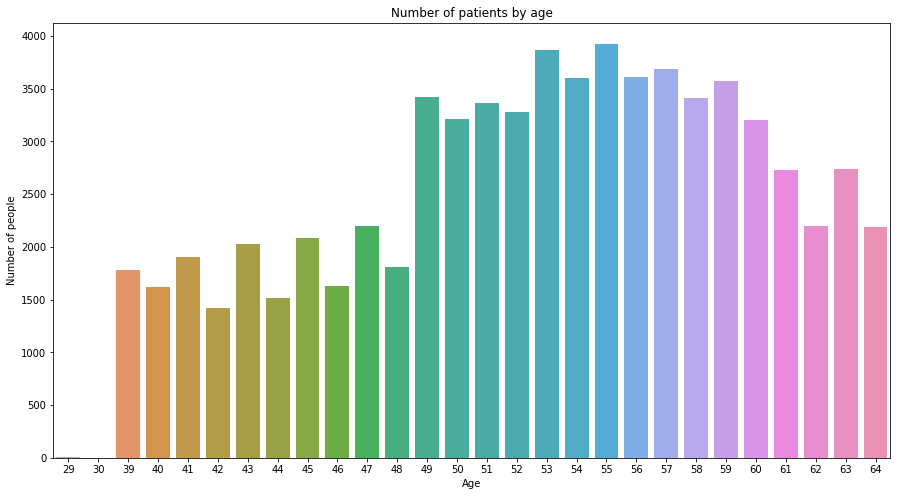

In [129]:
### Age distribution ###

#Age by years
df_age = df["age"]//365 

#Value count for "age"
df_age = pd.DataFrame(df_age.value_counts()).reset_index().rename(columns = {"index":"Age","age":"Number of people"}).sort_values("Age",ascending=True).reset_index(drop=True)

#plot
plt.figure(figsize=(15,8))
sns.barplot(
                data=df_age, 
                x="Age",
                y="Number of people",
            ).set(
                    title="Number of patients by age"
                    )

plt.show()

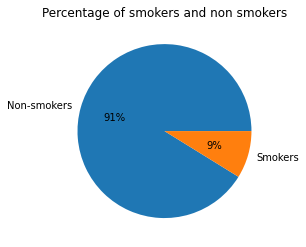

In [134]:
### Percentage of smokers ###

#Count values of smokers and non smokers
df_smoke = df[["smoke"]].value_counts()

#renaming columns 
df_smoke = pd.DataFrame(df_smoke).reset_index().rename(columns = {0:"Number of patients"})
df_smoke["smoke"] = ["Non-smokers","Smokers"]

#plot
plt.figure(facecolor="white")
plt.pie(
            df_smoke["Number of patients"], 
            labels = df_smoke["smoke"],
            autopct='%.0f%%' 
        )
plt.title("Percentage of smokers and non smokers")
plt.show()

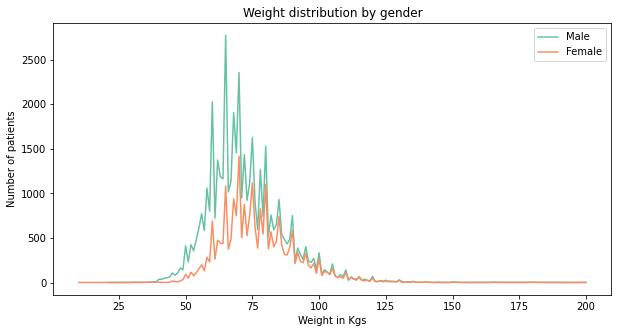

In [9]:
### Weight distribution ###

#group by weight and gender
df_weight = df[["weight","gender"]].astype("int32").groupby(["weight","gender"]).size()

#renaming columns
df_weight = pd.DataFrame(df_weight).reset_index().rename(columns={0:"Number of patients","gender":"Gender","weight":"Weight in Kgs"}).sort_values("Weight in Kgs",ascending=True).reset_index(drop=True)

#plot
plt.figure(figsize=(10,5))
sns.lineplot(data = df_weight, 
                x="Weight in Kgs", 
                y="Number of patients",
                hue="Gender",
                palette ="Set2"
                ).set(title = "Weight distribution by gender")
plt.legend(labels=["Male","Female"])

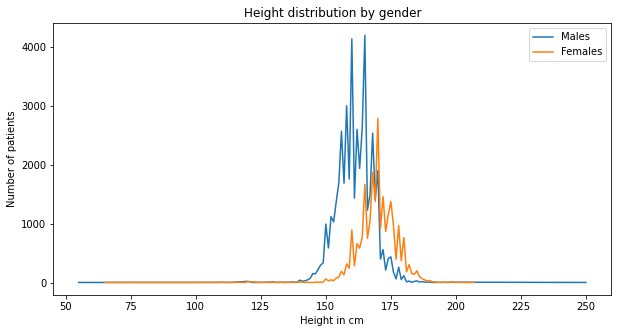

In [10]:
### Height distribution ###

#Height by gender
df_height = df_weight = df[["height","gender"]].astype("int32").groupby(["height","gender"]).size()

#Renaming the columns 
df_height = pd.DataFrame(df_height).reset_index().rename(columns={0:"Number of patients"}).sort_values("height",ascending=True).reset_index(drop=True)

#Plot
plt.figure(figsize=(10,5))
plt.plot(df_height[df_height["gender"]==1]["height"],df_height[df_height["gender"]==1]["Number of patients"])
plt.plot(df_height[df_height["gender"]==2]["height"],df_height[df_height["gender"]==2]["Number of patients"])
plt.ylabel("Number of patients")
plt.xlabel("Height in cm")
plt.title("Height distribution by gender")
plt.legend(("Males","Females"))

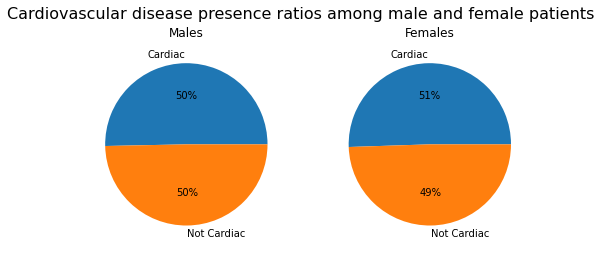

In [136]:
### Percentage of males and female patients having cardio disease ###

# dataframes for each gender 
df_men_cardio = pd.DataFrame(df[df.gender == 1][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})
df_women_cardio = pd.DataFrame(df[df.gender == 2][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})

#plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
fig.suptitle('Cardiovascular disease presence ratios among male and female patients', fontsize=16) # https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html
fig.set_facecolor("white")

ax[0].pie(df_men_cardio["Number of patients"],
            labels = ["Cardiac","Not Cardiac"],
            autopct='%.0f%%' )
ax[0].set_title("Males")

ax[1].pie(df_women_cardio["Number of patients"],
            labels = ["Cardiac","Not Cardiac"],
            autopct='%.0f%%' )
ax[1].set_title("Females")

plt.show()


# 2.1.0 Feature engineering : BMI 

In [3]:
### create BMI index ###

#slicing a copy from the original dataframe
df_modified = df[:]

#new column for the BMI
bmi = [weight/((height*0.01)**2) for weight,height in zip(df_modified["weight"],df_modified["height"])]
df_modified.insert(5, "BMI", bmi, True)

df_modified.head()

,id,age,gender,height,weight,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21.967120,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,34.927679,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,23.507805,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,28.710479,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,23.011177,100,60,1,1,0,0,0,0


I decided to remove the BMI's over 50 and under 15 since the categories we'll be working with and which are important to us are between 18.5 and 40, i believe a little range under 18 and over 40 would work, 15 to 50 is a good range of BMI to work with for in this case.

In [4]:
### cleaning unreal and extreme data ###

# removing patients with a BMI under 8 
length = len(df_modified)
df_modified = df_modified[ df_modified.BMI > 15 ]
df_modified.describe()
print("Removed",length-len(df_modified),"rows")

Removed 27 rows


In [5]:
# removing patients with a BMI under 8 
length = len(df_modified)
df_modified = df_modified[ df_modified.BMI < 50 ]
df_modified.describe()
print("Removed",length-len(df_modified),"rows")

Removed 244 rows


In [6]:
### creating BMI Categories ###

df_modified.insert(5,"BMI Category",[ "normal range" if (X < 25 and X>18.4) 
                                                else ("overweight" if X<30 
                                                else ("obese (class I)" if X<35 
                                                else ("obese (class II)" if X<40 
                                                else ("obese (class III)" if X>=40 
                                                else "Under weight"))))
                                                for X in df_modified["BMI"] ],True)

df_modified.head()

,id,age,gender,height,weight,BMI Category,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,normal range,21.967120,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,obese (class I),34.927679,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,normal range,23.507805,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,overweight,28.710479,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,normal range,23.011177,100,60,1,1,0,0,0,0


# 2.1.1 Feature engineering : Blood pressure

In [7]:
#removing negative blood pressure
length = len(df_modified)
df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]<0].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]<0].index)

#removing blood pressure values over 300 ( very rare and almost unrealistic)
df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]>300].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]>300].index)
print("Removed",length-len(df_modified),"rows")
#creating blood pressure categories
df_modified["Blood pressure"] = [ "Healthy" if (i<120 and j<80) 
                                            else( "Elevated" if (i>=120 and i< 130  and j<80) 
                                            else( "Stage 1 hypertension" if ((i>=130 and i< 140)  or ( j<90  and j>=80))
                                            else( "Stage 2 hypertension" if ((i>=140 and i<=180)  or ( j<=120  and j>=90))
                                            else("Hypertension crisis" if i>180 or j>90
                                            else "Non classified")))) for i,j in zip(df_modified["ap_hi"],df_modified["ap_lo"])]

df_modified.head()

Removed 993 rows


,id,age,gender,height,weight,BMI Category,BMI,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Blood pressure
0,0,18393,2,168,62.0,normal range,21.967120,110,80,1,1,0,0,1,0,Stage 1 hypertension
1,1,20228,1,156,85.0,obese (class I),34.927679,140,90,3,1,0,0,1,1,Stage 2 hypertension
2,2,18857,1,165,64.0,normal range,23.507805,130,70,3,1,0,0,0,1,Stage 1 hypertension
3,3,17623,2,169,82.0,overweight,28.710479,150,100,1,1,0,0,1,1,Stage 2 hypertension
4,4,17474,1,156,56.0,normal range,23.011177,100,60,1,1,0,0,0,0,Healthy


# 2.2.0 Data visualization

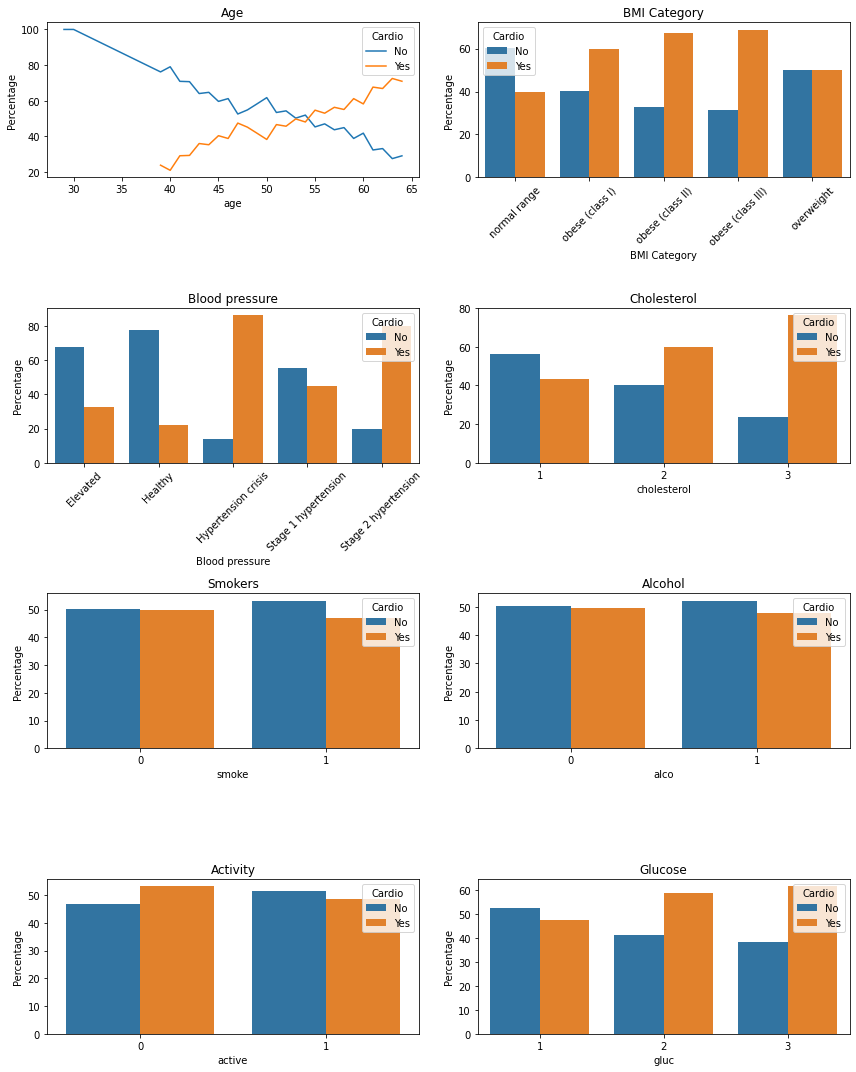

In [112]:
fig,ax = plt.subplots(4,2,figsize=(12,15))
plt.subplots_adjust(wspace=0.5,hspace=0.7)

def plot_feature_percentage(df_modified,feature,ax,title):
    cardio_series = [item for item in df_modified["cardio"]]
    feature_series = [item for item in df_modified[feature]]
    func_df = pd.DataFrame({"cardio":cardio_series, 
                                feature:feature_series})
    if feature=="age": 
        func_df[feature]=func_df[feature]//365
    func_df=pd.DataFrame(func_df.groupby(["cardio",feature]).size()).reset_index().rename(columns={0:"Number of patients"})
    func_df["Percentage"]=func_df['Number of patients'] / func_df.groupby(feature)['Number of patients'].transform('sum')*100
    if feature=="age":
        sns.lineplot(x=feature, y="Percentage", data=func_df,hue="cardio",ax=ax)
    else :
        sns.barplot(x=feature, y="Percentage", data=func_df,hue="cardio",ax=ax)
    
    if feature in ["Blood pressure","BMI Category"]:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=45) # https://stackoverflow.com/questions/11244514/modify-tick-label-text
    
    h, l = ax.get_legend_handles_labels() # https://stackoverflow.com/questions/53734332/seaborn-barplot-legend-labels-lose-color
    ax.legend(h, ["No","Yes"], title="Cardio")
    ax.set_title(title)
    
    
features_list = ["age","BMI Category","Blood pressure","cholesterol","smoke","alco","active","gluc"]
titles = ["Age","BMI Category","Blood pressure","Cholesterol","Smokers","Alcohol","Activity","Glucose"]
for i in range(4):
    for j in range(2): 
        plot_feature_percentage(df_modified,features_list[2*i+j],ax[i,j],titles[2*i+j])

fig.tight_layout()
plt.show()

# 2.2.1 Correlation visualization

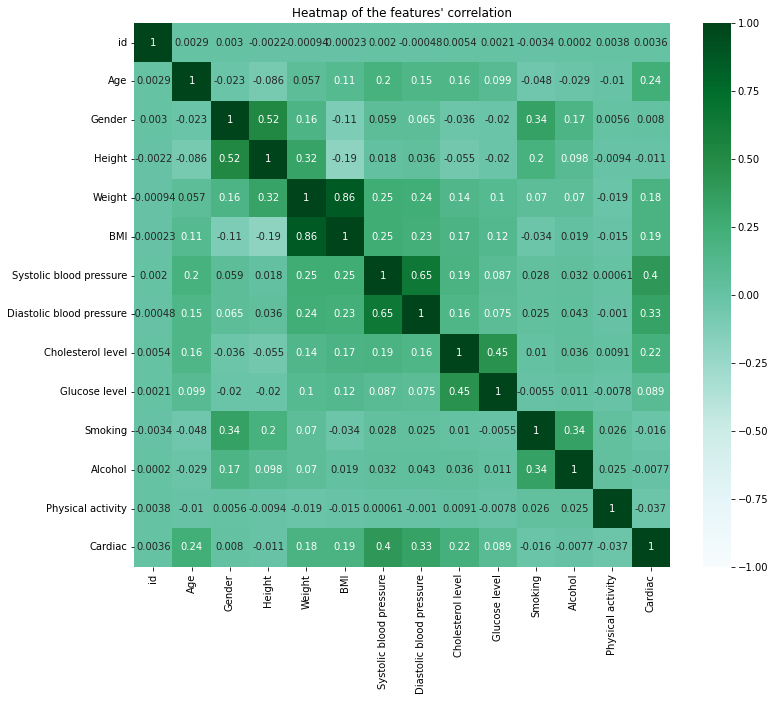

In [119]:
corr_df = df_modified.rename(columns ={"age":"Age", 
                                        "gender":"Gender",
                                        "height":"Height", 
                                        "weight":"Weight", 
                                        "ap_hi":"Systolic blood pressure", 
                                        "ap_lo":"Diastolic blood pressure", 
                                        "cholesterol":"Cholesterol level", 
                                        "gluc":"Glucose level", 
                                        "smoke":"Smoking", 
                                        "alco":"Alcohol", 
                                        "active":"Physical activity", 
                                        "cardio":"Cardiac", 
                                        })

plt.figure(figsize=(12, 10))
sns.heatmap(corr_df.corr(), vmin=-1, vmax=1, annot=True, cmap="BuGn")
plt.title("Heatmap of the features' correlation")
plt.show()

### The features with highest/lowest correlation : 
- **Diastolic/systolic blood pressure**: it is very normale that these values correlate as they tend to both increase or decrease.
- **Height/Gender** : We can see from the figure previousely made for the age distribution for males and females that males tend to be taller than females, which makes the gender and height correlate to a certain point. Weight and gender on the other hand have a correlation close to 0.
- **Weight/BMI** : The weight is a nominator in the equation of calculation of the BMI, so the BMI increases as the weight increases 
- **Height/BMI** : The height is a denominator in the equation of calculation of the BMI, the BMI increases as the height decreases, thus the negative correlation.

# 2.3 Create 2 datasets

In [19]:
df_discrete = df_modified.drop(["ap_hi","ap_lo","height","weight","BMI"],axis=1)

df_discrete.columns

Index(['id', 'age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
       'cardio', 'BMI Category', 'Blood pressure'],
      dtype='object')

In [20]:
df_discrete_onehot = pd.get_dummies(df_discrete, columns = ["gender", "BMI Category", "Blood pressure"], drop_first=True)

df_discrete_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68736 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   id                                   68736 non-null  int64
 1   age                                  68736 non-null  int64
 2   cholesterol                          68736 non-null  int64
 3   gluc                                 68736 non-null  int64
 4   smoke                                68736 non-null  int64
 5   alco                                 68736 non-null  int64
 6   active                               68736 non-null  int64
 7   cardio                               68736 non-null  int64
 8   gender_2                             68736 non-null  uint8
 9   BMI Category_obese (class I)         68736 non-null  uint8
 10  BMI Category_obese (class II)        68736 non-null  uint8
 11  BMI Category_obese (class III)       68736 non-null  u

In [21]:
df_continuous = df_modified.drop(["BMI Category", "Blood pressure","height","weight"],axis=1)

df_continuous.head()


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,100,60,1,1,0,0,0,0,23.011177


In [22]:
df_continuous_onehot = pd.get_dummies(df_continuous,columns=["gender"], drop_first=True)

df_continuous_onehot.head()


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_2
0,0,18393,110,80,1,1,0,0,1,0,21.967120,1
1,1,20228,140,90,3,1,0,0,1,1,34.927679,0
2,2,18857,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,100,60,1,1,0,0,0,0,23.011177,0


# 2.4 Chosing models 

In [23]:
#TODO: Try : RandomForest,SVM,KNN,LogisticRegression

In [24]:
# train validate test split 
from sklearn.model_selection import train_test_split

#splitting data into X and y : discrete data
X_d = df_discrete_onehot.drop(["id","cardio"],axis = 1)
y_d = df_discrete_onehot[["cardio"]]

#splitting data into X and y : continuous data
X_c = df_continuous_onehot.drop(["cardio","id"],axis = 1)
y_c = df_continuous_onehot[["cardio"]]

#train validation test split : discrete data
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X_d,y_d,test_size=.5)
X_val_d,X_test_d,y_val_d,y_test_d = train_test_split(X_test_d,y_test_d,test_size=.5)

#train validation test split : continuous data
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X_c,y_c,test_size=.5)
X_val_c,X_test_c,y_val_c,y_test_c = train_test_split(X_test_c,y_test_c,test_size=.5)

#print the shapes
print("Discrete dataframe : ")
print(f"Shapes of train data : {X_train_d.shape} and {y_train_d.shape}")
print(f"Shapes of validation data : {X_val_d.shape} and {y_val_d.shape}")
print(f"Shapes of test data : {X_test_d.shape} and {y_test_d.shape}")

print("\nContinuous dataframe : ")
print(f"Shapes of train data : {X_train_c.shape} and {y_train_c.shape}")
print(f"Shapes of validation data : {X_val_c.shape} and {y_val_c.shape}")
print(f"Shapes of test data : {X_test_c.shape} and {y_test_c.shape}")

Discrete dataframe : 
Shapes of train data : (34368, 15) and (34368, 1)
Shapes of validation data : (17184, 15) and (17184, 1)
Shapes of test data : (17184, 15) and (17184, 1)

Continuous dataframe : 
Shapes of train data : (34368, 10) and (34368, 1)
Shapes of validation data : (17184, 10) and (17184, 1)
Shapes of test data : (17184, 10) and (17184, 1)


In [25]:
### Decision Tree ##
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#general param grid for the model
param_grid_DecisionTree = {
        "DecisionTreeClassifier__max_depth": [3, 6, 8, 10],
        "DecisionTreeClassifier__min_weight_fraction_leaf": [0 , 0.1, 0.2, 0.3, 0.5],
        "DecisionTreeClassifier__min_samples_leaf": [1, 5, 10, 15, 20],
    }

#Using Standardizer
pipeline_DecisionTree_std = Pipeline([
                                    ("scaler", StandardScaler()),
                                    ("DecisionTreeClassifier", DecisionTreeClassifier())
                                ])

classifier_DecisionTree_std = GridSearchCV(
                                        estimator = pipeline_DecisionTree_std, 
                                        param_grid = param_grid_DecisionTree,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#Using MinMaxScaler
pipeline_DecisionTree_minmax = Pipeline([
                                    ("scaler", MinMaxScaler()),
                                    ("DecisionTreeClassifier", DecisionTreeClassifier())
                                ])

classifier_DecisionTree_minmax = GridSearchCV(
                                        estimator = pipeline_DecisionTree_minmax, 
                                        param_grid = param_grid_DecisionTree,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#continuous data 
classifier_DecisionTree_std.fit(X_train_c,y_train_c)
classifier_DecisionTree_minmax.fit(X_train_c,y_train_c)

#discrete data 
classifier_DecisionTree_std.fit(X_train_d,y_train_d)
classifier_DecisionTree_minmax.fit(X_train_d,y_train_d)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('DecisionTreeClassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'DecisionTreeClassifier__max_depth': [3, 6, 8, 10],
                         'DecisionTreeClassifier__min_samples_leaf': [1, 5, 10,
                                                                      15, 20],
                         'DecisionTreeClassifier__min_weight_fraction_leaf': [0,
                                                                              0.1,
                                                                              0.2,
                                                                              0.3,
                                                                              0.5]},
             scoring='recall')

In [26]:
### Random Forest ###
from sklearn.ensemble import RandomForestClassifier

#general param grid for the model
param_grid_RandomForest = {
                            "RandomForestClassifier__n_estimators": [200],
                            "RandomForestClassifier__max_depth": [5,10,15],
                            "RandomForestClassifier__min_samples_leaf": [2, 3, 4],
                        }

#Using Standardizer
pipeline_RandomForest_std = Pipeline([
                                    ("scaler", StandardScaler()),
                                    ("RandomForestClassifier", RandomForestClassifier())
                                ])

classifier_RandomForest_std = GridSearchCV(
                                        estimator = pipeline_RandomForest_std, 
                                        param_grid = param_grid_RandomForest,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#Using MinMaxScaler
pipeline_RandomForest_minmax = Pipeline([
                                    ("scaler", MinMaxScaler()),
                                    ("RandomForestClassifier", RandomForestClassifier())
                                ])

classifier_RandomForest_minmax = GridSearchCV(
                                        estimator = pipeline_RandomForest_minmax, 
                                        param_grid = param_grid_RandomForest,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#continuous data 
classifier_RandomForest_std.fit(X_train_c,y_train_c)
classifier_RandomForest_minmax.fit(X_train_c,y_train_c)

#discrete data 
classifier_RandomForest_std.fit(X_train_d,y_train_d)
classifier_RandomForest_minmax.fit(X_train_d,y_train_d)

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, *

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('RandomForestClassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RandomForestClassifier__max_depth': [5, 10, 15],
                         'RandomForestClassifier__min_samples_leaf': [2, 3, 4],
                         'RandomForestClassifier__n_estimators': [200]},
             scoring='recall')

In [46]:
### Logistic Regression ###
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV

#general param grid for the model
param_grid_LogisticRegression = {
        "LogisticRegression__penalty":["elasticnet"],
        "LogisticRegression__solver":["saga"],
        "LogisticRegression__C": [0.001, 0.01, 0.1, 1, 10, 100],
        "LogisticRegression__l1_ratio": [0.0001, 0.001, 0.01, 0.1, 1]
    }

#Using Standardizer
pipeline_LogisticRegression_std = Pipeline([
                                    ("scaler", StandardScaler()),
                                    ("LogisticRegression", LogisticRegression())
                                ])

classifier_LogisticRegression_std = GridSearchCV(
                                        estimator = pipeline_LogisticRegression_std, 
                                        param_grid = param_grid_LogisticRegression,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#Using MinMaxScaler
pipeline_LogisticRegression_minmax = Pipeline([
                                    ("scaler", MinMaxScaler()),
                                    ("LogisticRegression", LogisticRegression())
                                ])

classifier_LogisticRegression_minmax = GridSearchCV(
                                        estimator = pipeline_LogisticRegression_minmax, 
                                        param_grid = param_grid_LogisticRegression,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#continuous data 
classifier_LogisticRegression_std.fit(X_train_c,y_train_c)
classifier_LogisticRegression_minmax.fit(X_train_c,y_train_c)

#discrete data 
classifier_LogisticRegression_std.fit(X_train_d,y_train_d)
classifier_LogisticRegression_minmax.fit(X_train_d,y_train_d)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('LogisticRegression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10,
                                                   100],
                         'LogisticRegression__l1_ratio': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                         'LogisticRegression__penalty': ['elasticnet'],
                         'LogisticRegression__solver': ['saga']},
             scoring='recall')

In [56]:
### Linear SVC ### 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

#general param grid for the model
param_grid_LinearSVC = {
        
    }

#Using Standardizer
pipeline_LinearSVC_std = Pipeline([
                                    ("scaler", StandardScaler()),
                                    ("svm",LinearSVC(max_iter=20000))
                                ])

classifier_LinearSVC_std = GridSearchCV(
                                        estimator = pipeline_LinearSVC_std, 
                                        param_grid = param_grid_LinearSVC,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#Using MinMaxScaler
pipeline_LinearSVC_minmax = Pipeline([
                                    ("scaler", MinMaxScaler()),
                                    ("svm",LinearSVC(max_iter=20000))
                                ])

classifier_LinearSVC_minmax = GridSearchCV(
                                        estimator = pipeline_LinearSVC_minmax, 
                                        param_grid = param_grid_LinearSVC,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#continuous data 
classifier_LinearSVC_std.fit(X_train_c,y_train_c)
classifier_LinearSVC_minmax.fit(X_train_c,y_train_c)

#discrete data 
classifier_LinearSVC_std.fit(X_train_d,y_train_d)
classifier_LinearSVC_minmax.fit(X_train_d,y_train_d)

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', LinearSVC(max_iter=20000))]),
             n_jobs=-1, param_grid={}, scoring='recall')

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#general param grid for the model
param_grid_KNN = {
    "KNN__n_neighbors": [5,10,15,20,30,40,50]
    }

#Using Standardizer
pipeline_KNN_std = Pipeline([
                                    ("scaler", StandardScaler()),
                                    ("KNN", KNeighborsClassifier())
                                ])

classifier_KNN_std = GridSearchCV(
                                        estimator = pipeline_KNN_std, 
                                        param_grid = param_grid_KNN,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#Using MinMaxScaler
pipeline_KNN_minmax = Pipeline([
                                    ("scaler", MinMaxScaler()),
                                    ("KNN", KNeighborsClassifier())
                                ])

classifier_KNN_minmax = GridSearchCV(
                                        estimator = pipeline_KNN_minmax, 
                                        param_grid = param_grid_KNN,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )

#continuous data 
classifier_KNN_std.fit(X_train_c,y_train_c)
classifier_KNN_minmax.fit(X_train_c,y_train_c)

#discrete data 
classifier_KNN_std.fit(X_train_d,y_train_d)
classifier_KNN_minmax.fit(X_train_d,y_train_d)

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Sami/.local/share/vir

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
             scoring='recall')

In [47]:
# changing the y data shape to avoid shape warnings

y_train_c = np.array(y_train_c).ravel()
y_train_d = np.array(y_train_d).ravel()
y_test_c = np.array(y_test_c).ravel()
y_test_d = np.array(y_test_d).ravel()
y_val_c = np.array(y_val_c).ravel()
y_val_d = np.array(y_val_d).ravel()

In [53]:
#scaling methods
scaling_methods_names = ["Standardization","Normalization"]
scaling_methods = [StandardScaler(),MinMaxScaler()]

#data
dataset_names = ["Continuous","Discrete"]
data_list = [[X_train_c,y_train_c,X_test_c,y_test_c,X_val_c,y_val_c],[X_train_d,y_train_d,X_test_d,y_test_d,X_val_d,y_val_d]]

#models 
model_names = ["LinearSVC","LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNN"]
models = [LinearSVC(),LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()]

#param grids
param_grids_list = [{
                        "LinearSVC__max_iter":[10000],
                    },
                    {
                        "LogisticRegression__penalty":["elasticnet"],
                        "LogisticRegression__solver":["saga"],
                        "LogisticRegression__C": [0.001, 0.01, 0.1, 1, 10, 100],
                        "LogisticRegression__l1_ratio": [0.0001, 0.001, 0.01, 0.1, 1]
                    },
                    {
                        "RandomForestClassifier__n_estimators": [200],
                        "RandomForestClassifier__max_depth": [5,10,15],
                        "RandomForestClassifier__min_samples_leaf": [2, 3, 4],
                    }, 
                    {
                        "DecisionTreeClassifier__max_depth": [3, 6, 8, 10],
                        "DecisionTreeClassifier__min_weight_fraction_leaf": [0 , 0.1, 0.2, 0.3, 0.5],
                        "DecisionTreeClassifier__min_samples_leaf": [1, 5, 10, 15, 20],
                    },
                    {
                        "KNN__n_neighbors": [5,10,15,20,30,40,50]
                    }
                    ]



In [76]:
from sklearn.metrics import accuracy_score,recall_score

clf_df = pd.DataFrame()
classifiers_dict = {}

print("Running ...")
for dataset_name,data in zip(dataset_names,data_list):
    print(dataset_name," dataset : ")
    for i in range(len(model_names)):
        #model
        model_name=model_names[i]
        model=models[i]
        print("     ",model_name," :")
        for scaling_method_name,scaling_method in zip(scaling_methods_names,scaling_methods):
            print("          ",scaling_method_name)
            #data 
            X_train = data[0]
            y_train = data[1]
            X_test = data[2]
            y_test = data[3]
            X_val = data[4]
            y_val = data[5]

            #param grid 
            param_grid = param_grids_list[i]

            #creating pipeline
            pipeline = Pipeline([
                                    ("scaler", scaling_method),
                                    (model_name, model)
                                ])
            
            #gridsearch classifier
            clf = GridSearchCV(
                                        estimator = pipeline, 
                                        param_grid = param_grid,
                                        cv = 3, 
                                        verbose = 0, 
                                        scoring = "recall", 
                                        n_jobs = -1
                                    )
            
            #print(f"Running : Dataset :{dataset_name} - Model : {model_name} - Scaling method : {scaling_method_name}")
            clf.fit(X_train,y_train)
            print(f"\b - Best recall : {clf.best_score_}")
            y_val_pred = clf.predict(X_val) 
            recall = recall_score(y_val,y_val_pred)
            accuracy = accuracy_score(y_val,y_val_pred)
            
            results = pd.DataFrame({ 
                                    "Model":[model_name],
                                    "Scaling Method":[scaling_method_name],
                                    "DataFrame":[dataset_name],
                                    "Best Recall":[clf.best_score_], 
                                    "Validation Recall":[recall], 
                                    "Validation Accuracy":[accuracy]
                                    })

            clf_df= pd.concat([clf_df, results], ignore_index = True, axis = 0)

            
            classifiers_dict[f"{dataset_name}_dataset/{model_name}/{scaling_method_name}"]=clf

            


Running : Dataset :Continuous - Model : LinearSVC - Scaling method : Standardization
Best recall : 0.6652519893899204
Running : Dataset :Continuous - Model : LinearSVC - Scaling method : Normalization
Best recall : 0.6653698791629825
Running : Dataset :Continuous - Model : LogisticRegression - Scaling method : Standardization
Best recall : 0.671264367816092
Running : Dataset :Continuous - Model : LogisticRegression - Scaling method : Normalization
Best recall : 0.6745063365753022
Running : Dataset :Continuous - Model : RandomForestClassifier - Scaling method : Standardization
Best recall : 0.6904214559386973
Running : Dataset :Continuous - Model : RandomForestClassifier - Scaling method : Normalization
Best recall : 0.6913645741231949
Running : Dataset :Continuous - Model : DecisionTreeClassifier - Scaling method : Standardization
Best recall : 0.7263778367226643
Running : Dataset :Continuous - Model : DecisionTreeClassifier - Scaling method : Normalization
Best recall : 0.726377836722

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best recall : 0.6099940451406791
Running : Dataset :Discrete - Model : LinearSVC - Scaling method : Normalization
Best recall : 0.6099940451406791
Running : Dataset :Discrete - Model : LogisticRegression - Scaling method : Standardization
Best recall : 0.622885671359502
Running : Dataset :Discrete - Model : LogisticRegression - Scaling method : Normalization
Best recall : 0.622885671359502
Running : Dataset :Discrete - Model : RandomForestClassifier - Scaling method : Standardization
Best recall : 0.6380835832431123
Running : Dataset :Discrete - Model : RandomForestClassifier - Scaling method : Normalization
Best recall : 0.6387341103902243
Running : Dataset :Discrete - Model : DecisionTreeClassifier - Scaling method : Standardization
Best recall : 0.7296278256990979
Running : Dataset :Discrete - Model : DecisionTreeClassifier - Scaling method : Normalization
Best recall : 0.7296278256990979
Running : Dataset :Discrete - Model : KNN - Scaling method : Standardization
Best recall : 0.65

In [77]:
clf_df.sort_values("Best Recall")

,Model,Scaling Method,DataFrame,Best Recall,Validation Recall,Validation Accuracy
11,LinearSVC,Normalization,Discrete,0.609994,0.601907,0.701699
10,LinearSVC,Standardization,Discrete,0.609994,0.601790,0.701641
13,LogisticRegression,Normalization,Discrete,0.622886,0.616272,0.701990
12,LogisticRegression,Standardization,Discrete,0.622886,0.616272,0.701990
14,RandomForestClassifier,Standardization,Discrete,0.638084,0.635347,0.698208
15,RandomForestClassifier,Normalization,Discrete,0.638734,0.636053,0.699837
19,KNN,Normalization,Discrete,0.651626,0.646532,0.683892
18,KNN,Standardization,Discrete,0.654642,0.647121,0.682437
0,LinearSVC,Standardization,Continuous,0.665252,0.654954,0.722416
1,LinearSVC,Normalization,Continuous,0.665370,0.654720,0.722300


In [115]:
for i,element in enumerate(classifiers_dict): 
    dataset_name,model_name,scaling_method_name = element.split("/")
    print(dataset_name,", ",model_name,", ",scaling_method_name)
    print("     ",classifiers_dict[element].best_params_,"\n")

    #printing 5 elements only 
    #if i==4:
    #    break

Continuous_dataset ,  LinearSVC ,  Standardization
      {'LinearSVC__max_iter': 10000} 

Continuous_dataset ,  LinearSVC ,  Normalization
      {'LinearSVC__max_iter': 10000} 

Continuous_dataset ,  LogisticRegression ,  Standardization
      {'LogisticRegression__C': 0.1, 'LogisticRegression__l1_ratio': 1, 'LogisticRegression__penalty': 'elasticnet', 'LogisticRegression__solver': 'saga'} 

Continuous_dataset ,  LogisticRegression ,  Normalization
      {'LogisticRegression__C': 0.1, 'LogisticRegression__l1_ratio': 0.001, 'LogisticRegression__penalty': 'elasticnet', 'LogisticRegression__solver': 'saga'} 

Continuous_dataset ,  RandomForestClassifier ,  Standardization
      {'RandomForestClassifier__max_depth': 15, 'RandomForestClassifier__min_samples_leaf': 4, 'RandomForestClassifier__n_estimators': 200} 

Continuous_dataset ,  RandomForestClassifier ,  Normalization
      {'RandomForestClassifier__max_depth': 15, 'RandomForestClassifier__min_samples_leaf': 4, 'RandomForestClassifier

In [116]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier([
                                ("LinearSVC",LinearSVC(max_iter=10000)),
                                ("LogisticRegression",LogisticRegression( 
                                                                            C=0.1, 
                                                                            penalty="elasticnet", 
                                                                            solver = "saga", 
                                                                            l1_ratio=1
                                                                            )),
                                ("RandomForestClassifier",RandomForestClassifier( 
                                                                                    max_depth=15, 
                                                                                    min_samples_leaf=4, 
                                                                                    n_estimators = 200
                                                                                    )),
                                ("DecisionTreeClassifier",DecisionTreeClassifier( 
                                                                                    max_depth = 3, 
                                                                                    min_samples_leaf = 1, 
                                                                                    min_weight_fraction_leaf= 0.1
                                                                                    )),
                                ("KNN",KNeighborsClassifier( 
                                                            n_neighbors = 15
                                                            ))
                                ])

In [117]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

def evaluate_model(model,dataframe_name):

    if dataframe_name=="Continuous":
        X_train,y_train,X_test,y_test = X_train_c,y_train_c,X_test_c,y_test_c
    elif dataframe_name=="Discrete":
        X_train,y_train,X_test,y_test = X_train_d,y_train_d,X_test_d,y_test_d

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_pred,y_test))
    cm = confusion_matrix(y_test,y_pred)

    disp = ConfusionMatrixDisplay(cm,display_labels = ["No Cardio","Cardio"])

    disp.plot() 
    disp.ax_.set_title(f"Voters on the {dataframe_name} dataframe.")

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.66      0.72     10368
           1       0.58      0.74      0.65      6816

    accuracy                           0.69     17184
   macro avg       0.69      0.70      0.68     17184
weighted avg       0.71      0.69      0.69     17184



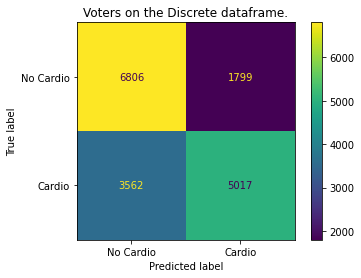

In [118]:
evaluate_model(vote_clf,"Discrete")

/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.81      0.69      0.75     10221
           1       0.63      0.77      0.69      6963

    accuracy                           0.72     17184
   macro avg       0.72      0.73      0.72     17184
weighted avg       0.74      0.72      0.73     17184



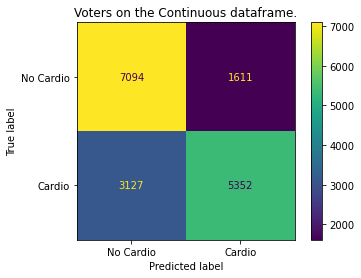

In [119]:
evaluate_model(vote_clf,"Continuous")